# TAD_FINAL_PROJECT_Broker_Carl

- [1. Research Question](#1.)
- [2. Import Datasets](#2.)
  - [2.1 Setup](#2.1)
  - [2.2 Import Game Reviews via API](#2.2)
  - [2.3 Clean Game Reviews](#2.3)
  - [2.4 Save Game Reviews](#2.4)
  - [2.5 Import 'Users Per Day'](#2.5)
- [3. Analysis](#3.)
  - [3.1 Sentiment Analysis](#3.1)
    - [3.1.1 Setup](#3.1.1)
    - [3.1.2 Load Training Datasets and Pre-Process](#3.1.2)
    - [3.1.3 Pre-Process Cont. (Tokenize Data)](#3.1.3)
    - [3.1.4 Neural Network Sentiment Classification with BERT and Hugging Face](#3.1.4)
    - [3.1.5 Training (of Model)](#3.1.5)
    - [3.1.6 Sentiment Analysis of Game Reviews](#3.1.6)
  - [3.2 Sentiment Over Time](#3.2)
    - [3.2.1 Setup](#3.2.1)
    - [3.2.2 Figures](#3.2.2)
  - [3.3 Sentiment Distribution vs. Twitch Views](#3.3)
- [4. Closing Thoughts](#4.)

<a id='#1.'></a>

## 1. Research Question

        I am currently seeking employment in the field of Machine Learning, and gearing my coursework around such. 
        
        For several years, since I played Halflife as a boy, I've dreamed of working at Valve. So, as I progress through my career I submit a job applicaiton to them yearly. In 2018 a team member there responsed to my application and said I wasn't ready. So, I've maintained contact with them showcasing my progress in Graduate School. This summer, studying Natural Language Processing(NLP) gave me the enviornament I needed to scratch the surface of game reviews and what analyzing such entails. Below you will find the suggestions the Valve member gave me to explore during my summer course. I attempted, keyword 'attempted' here, to answer as many of them as I could. Please see my 4. Closing Thoughts section for description of my successes and failures.

Hi Carl,

There would seem to be a wide range of analyses to pursue:

--Can you predict review scores from review text?

--If yes, why?  If not, why not?

--Do review texts predict game sales, user counts, retention over time, etc.?

--Can you quantify user sentiment about a game? 

--Can you watch that sentiment shift over time?

--How many different sentiments can you identify?

--How many reviews contain multiple sentiments? 

I’m sure there are many more, but those are a few that seemed useful off the top of my head.

Best of luck with the project!

Mike
Steam

(Over the Summer I attempted to answer as many of these questions as I could.)

<a id='#2.'></a>

## 2. Import Datasets:

<a id='#2.1'></a>

### 2.1 Setup

In [1]:
# import packages
import os
import sys
import time
import json
import numpy as np
import pandas as pd
import urllib.parse
import urllib.request
from tqdm import tqdm
import plotly.express as px
from datetime import datetime
from pandas import json_normalize

# list package ver. etc.
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)
print('---------------')

Python version
3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
---------------


<a id='#2.2'></a>

## 2.2 Import Game Reviews via API
##### (API Documentation: https://partner.steamgames.com/doc/store/getreviews)

In [2]:
# generate game review df

#steam 'chunks' their json files (the game reviews) in sets of 100
#ending with a signature, a 'cursor'. This cursor is then pasted
#onto the the same url, to 'grab' the next chunk and so on. 
#This sequence block with an 'end cursor' of 'AoJ4tey90tECcbOXSw=='

#set variables
url_base = 'https://store.steampowered.com/appreviews/393380?json=1&filter=updated&language=all&review_type=all&purchase_type=all&num_per_page=100&cursor='

#first pass
url = urllib.request.urlopen("https://store.steampowered.com/appreviews/393380?json=1&filter=updated&language=all&review_type=all&purchase_type=all&num_per_page=100&cursor=*")
data = json.loads(url.read().decode())
next_cursor = data['cursor']
next_cursor = next_cursor.replace('+', '%2B')
df1 = json_normalize(data['reviews'])
print(next_cursor)

#add results till stopcursor met, then send all results to csv
while True:
    time.sleep(0.5) # Sleep for half-second
    url_temp = url_base + next_cursor
    url = urllib.request.urlopen(url_temp)
    data = json.loads(url.read().decode())
    next_cursor = data['cursor']
    next_cursor = next_cursor.replace('+', '%2B')
    df2 = json_normalize(data['reviews'])
    df1 = pd.concat([df1, df2])
    print(next_cursor)
    if next_cursor == 'AoJ44PCp0tECd4WXSw==' or next_cursor == '*':
        df_steam_reviews = df1
        df1 = None
        break
        
#the hash below is each 'cursor' I loop through until the 'end cursor'.
#this is just my way of monitoring the download.

AoJ46NGx/PMCfNuy0wE=
AoJ49MWW%2BPMCcKrFmwI=
AoJ40pPx8/MCeKz3igE=
AoJ4rvzh7vMCe6yMuQE=
AoJw/f%2BJ6vMCceK3mgI=
AoJwrquh5fMCfOeEmgI=
AoJw25av4fMCf8CfdA==
AoJ4g8Tm3fMCeIi4mQI=
AoJw1ODA2PMCfYeFmQI=
AoJ46cuj0/MCeffVmAI=
AoJwoNHNzvMCeoqsmAI=
AoJ4qau3yfMCcqL8lwI=
AoJ4u/ymxfMCeOjQlwI=
AoJwuvX2wPMCcceX1AE=
AoJ4oZDdu/MCec73lgI=
AoJwwvHPtvMCedz/owE=
AoJw9feDsfMCeoOJlgI=
AoJw%2BIiNrPMCd/HEwwE=
AoJ4t8j2p/MCcouslQI=
AoJwg%2BzqovMCcZ32lAI=
AoJ4vY/TnfMCdvG4lAI=
AoJ4k/iXmfMCcID%2BkwI=
AoJ4jbu4lfMCc77PkwI=
AoJ486LEkPMCfbaQkwI=
AoJ48fzOjPMCfaDOiQE=
AoJ4x5PYiPMCcKmmkgI=
AoJ435TehfMCeaz9kQI=
AoJwyJbigvMCcOjRkQI=
AoJ43ebEgPMCf6uykQI=
AoJwi5S2/PICfcPykAI=
AoJwqY6X%2BPICc96BiQI=
AoJ4lIf68vICcp/ujwI=
AoJwpeav6/ICdeuojwI=
AoJ4sJHm5PICd7/sjgI=
AoJ4l%2BvE3fICepaqjgI=
AoJw1ZXa1vICebPijQI=
AoJ4iqDA0PICctWsjQI=
AoJwsYyIyvICfLvyjAI=
AoJ417q6w/ICdO%2ByjAI=
AoJ4weLJv/ICeuyMjAI=
AoJ4je%2BUuvICeMfdiwI=
AoJwqIvytfICera6lQE=
AoJw4/2PsPICfpP%2BigI=
AoJ4lqOJqvICcKnEigI=
AoJ4mJmmpvICfoecigI=
AoJw94ruofICeMXtiQI=
AoJwxOiKnvICfe

In [3]:
# inspect columns
print(df_steam_reviews.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53885 entries, 0 to 84
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   recommendationid                53885 non-null  object 
 1   language                        53885 non-null  object 
 2   review                          53885 non-null  object 
 3   timestamp_created               53885 non-null  int64  
 4   timestamp_updated               53885 non-null  int64  
 5   voted_up                        53885 non-null  bool   
 6   votes_up                        53885 non-null  int64  
 7   votes_funny                     53885 non-null  int64  
 8   weighted_vote_score             53885 non-null  object 
 9   comment_count                   53885 non-null  int64  
 10  steam_purchase                  53885 non-null  bool   
 11  received_for_free               53885 non-null  bool   
 12  written_during_early_access     538

In [4]:
# inspect shape
print(df_steam_reviews.shape)

(53885, 22)


---
### Data Dictionary:

- Response:
    - success - 1 if the query was successful
    - query_summary - Returned in the first request
        - recommendationid - The unique id of the recommendation
        - author
            - steamid - the user’s SteamID
            - um_games_owned - number of games owned by the user
            - num_reviews - number of reviews written by the user
            - playtime_forever - lifetime playtime tracked in this app
            - playtime_last_two_weeks - playtime tracked in the past two weeks for this app
            - playtime_at_review - playtime when the review was written
            - last_played - time for when the user last played
        - language - language the user indicated when authoring the review
        - review - text of written review
        - timestamp_created - date the review was created (unix timestamp)
        - timestamp_updated - date the review was last updated (unix timestamp)
        - voted_up - true means it was a positive recommendation
        - votes_up - the number of users that found this review helpful
        - votes_funny - the number of users that found this review funny
        - weighted_vote_score - helpfulness score
        - comment_count - number of comments posted on this review
        - steam_purchase - true if the user purchased the game on Steam
        - received_for_free - true if the user checked a box saying they got the app for free
        - written_during_early_access - true if the user posted this review while the game was in Early Access
        - developer_response - text of the developer response, if any
        - timestamp_dev_responded - Unix timestamp of when the developer responded, if applicable

---
Source: https://partner.steamgames.com/doc/store/getreviews

In [5]:
# inspect df
df_steam_reviews

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,timestamp_dev_responded,developer_response
0,50283523,turkish,-Türk sunucularının gelmesi gerekiyor.Çünkü 10...,1556031648,1597768248,True,2,0,0.474678128957748413,0,...,True,76561198396250418,35,6,7440,995,7440.0,1597768145,NaN,NaN
1,74514185,english,This game has honestly been the sole game to r...,1597767872,1597767872,True,0,0,0,0,...,True,76561198026597832,179,2,7576,1142,7515.0,1597771509,NaN,NaN
2,74514089,russian,Выглядит как слендер 2012 ( лес точно такой же...,1597767738,1597767804,False,0,0,0,0,...,True,76561198118747802,167,12,1442,0,1442.0,1594336841,NaN,NaN
3,74512838,schinese,WOSHISHABI,1597766096,1597766096,True,0,0,0,0,...,True,76561198960370335,26,3,1084,26,1057.0,1597770750,NaN,NaN
4,74511652,english,Not played it that much. But a 9 out of 10.,1597764566,1597764566,True,0,0,0,0,...,True,76561198071379287,120,1,79357,2767,79236.0,1597771652,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,19708009,english,Communication and teamplay is one of the best ...,1450166529,1450166529,True,44,3,0.56737816333770752,0,...,True,76561198014615390,255,2,13623,0,2788.0,1589089421,NaN,NaN
81,19708002,english,If you're looking for a realistic mil-sim styl...,1450166484,1450166484,True,38,2,0.637543141841888428,0,...,True,76561198066675517,543,9,4512,0,1900.0,1587823021,NaN,NaN
82,19707993,english,ITS THE BEST GAME EVERS \n\nPlay this game if ...,1450166426,1450166426,True,205,517,0.549367070198059082,13,...,True,76561198048218734,97,11,112864,85,3690.0,1597706098,NaN,NaN
83,19707992,english,(Disclaimer: This game used to not be on Steam...,1450166424,1450166424,True,157,9,0.790206074714660645,0,...,True,76561198038225005,254,8,3969,0,1193.0,1589425139,NaN,NaN


<a id='#2.3'></a>

## 2.3 Clean Game Reviews

In [6]:
#drop empty cols 'timestamp_dev_responded' and 'developer_response'
df_steam_reviews = df_steam_reviews.drop(['timestamp_dev_responded', 'developer_response'], axis=1)

# convert unix timestamp columns to datetime format
def time_to_clean(x):
    return datetime.fromtimestamp(x)

df_steam_reviews['timestamp_created'] = df_steam_reviews['timestamp_created'].apply(time_to_clean)
df_steam_reviews['timestamp_updated'] = df_steam_reviews['timestamp_updated'].apply(time_to_clean)
df_steam_reviews['author.last_played'] = df_steam_reviews['author.last_played'].apply(time_to_clean)

# inspect
df_steam_reviews

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,50283523,turkish,-Türk sunucularının gelmesi gerekiyor.Çünkü 10...,2019-04-23 10:00:48,2020-08-18 11:30:48,True,2,0,0.474678128957748413,0,True,False,True,76561198396250418,35,6,7440,995,7440.0,2020-08-18 11:29:05
1,74514185,english,This game has honestly been the sole game to r...,2020-08-18 11:24:32,2020-08-18 11:24:32,True,0,0,0,0,False,False,True,76561198026597832,179,2,7576,1142,7515.0,2020-08-18 12:25:09
2,74514089,russian,Выглядит как слендер 2012 ( лес точно такой же...,2020-08-18 11:22:18,2020-08-18 11:23:24,False,0,0,0,0,False,True,True,76561198118747802,167,12,1442,0,1442.0,2020-07-09 18:20:41
3,74512838,schinese,WOSHISHABI,2020-08-18 10:54:56,2020-08-18 10:54:56,True,0,0,0,0,True,False,True,76561198960370335,26,3,1084,26,1057.0,2020-08-18 12:12:30
4,74511652,english,Not played it that much. But a 9 out of 10.,2020-08-18 10:29:26,2020-08-18 10:29:26,True,0,0,0,0,True,False,True,76561198071379287,120,1,79357,2767,79236.0,2020-08-18 12:27:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,19708009,english,Communication and teamplay is one of the best ...,2015-12-15 02:02:09,2015-12-15 02:02:09,True,44,3,0.56737816333770752,0,False,False,True,76561198014615390,255,2,13623,0,2788.0,2020-05-10 00:43:41
81,19708002,english,If you're looking for a realistic mil-sim styl...,2015-12-15 02:01:24,2015-12-15 02:01:24,True,38,2,0.637543141841888428,0,False,False,True,76561198066675517,543,9,4512,0,1900.0,2020-04-25 08:57:01
82,19707993,english,ITS THE BEST GAME EVERS \n\nPlay this game if ...,2015-12-15 02:00:26,2015-12-15 02:00:26,True,205,517,0.549367070198059082,13,False,False,True,76561198048218734,97,11,112864,85,3690.0,2020-08-17 18:14:58
83,19707992,english,(Disclaimer: This game used to not be on Steam...,2015-12-15 02:00:24,2015-12-15 02:00:24,True,157,9,0.790206074714660645,0,False,False,True,76561198038225005,254,8,3969,0,1193.0,2020-05-13 21:58:59


<a id='#2.4'></a>

## 2.4 Save Game Reviews

In [7]:
# save that sheet
df_steam_reviews.to_csv(r'../data/processed/game_reviews_processed.csv', index=False)

<a id='#2.5'></a>

## 2.5 Import 'Users Per Day'

In [8]:
#load 'steam charts for every day' downloaded by hand from https://steamdb.info/ on August 14th 
df_upd = pd.read_csv(r'../data/processed/users_per_day.csv')

In [9]:
#convert 'DateTime' col to datetime Dtype.
df_upd['DateTime'] = pd.to_datetime(df_upd['DateTime'])

In [10]:
#inspect cols
print(df_upd.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        1748 non-null   datetime64[ns]
 1   Players         1731 non-null   float64       
 2   Flags           0 non-null      float64       
 3   Twitch Viewers  1088 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 54.8 KB
None


In [11]:
#inspect shape
df_upd.shape

(1748, 4)

In [12]:
#inspect df
df_upd

,DateTime,Players,Flags,Twitch Viewers
0,2015-11-01,5.0,NaN,NaN
1,2015-11-02,NaN,NaN,NaN
2,2015-11-03,NaN,NaN,NaN
3,2015-11-04,NaN,NaN,NaN
4,2015-11-05,NaN,NaN,NaN
...,...,...,...,...
1743,2020-08-09,6141.0,NaN,254.0
1744,2020-08-10,5210.0,NaN,890.0
1745,2020-08-11,5083.0,NaN,370.0
1746,2020-08-12,4987.0,NaN,654.0


<a id='#3.'></a>

# 3. Analysis: 

<a id='#3.1'></a>

## 3.1 Sentiment Analysis
--Can you quantify user sentiment about a game? 

<a id='#3.1.1'></a>

## 3.1.1 Setup

In [13]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import os as os
import sys as sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
from torch import nn, optim
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import json
import pandas as pd
import urllib.parse
import urllib.request
from time import sleep
from pandas import json_normalize

#set graph config
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

#set seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

#check gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

<a id='#3.1.2'></a>

## 3.1.2 Load Training Datasets and Pre-Process

In [14]:
#load training dataset (google app reviews, 16K rows)
df_google = pd.read_csv(r'../data/processed/reviews.csv')

In [15]:
#inspect google reviews
df_google.head(0)

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId


In [16]:
#inspect #2
df_google.shape

(15746, 11)

In [17]:
#The imbalce is ok, because we're dividing between negative(1,2) neutral(3) and positive (4,5).
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

#apply above function to dataset
df_google['sentiment'] = df_google.score.apply(to_sentiment)

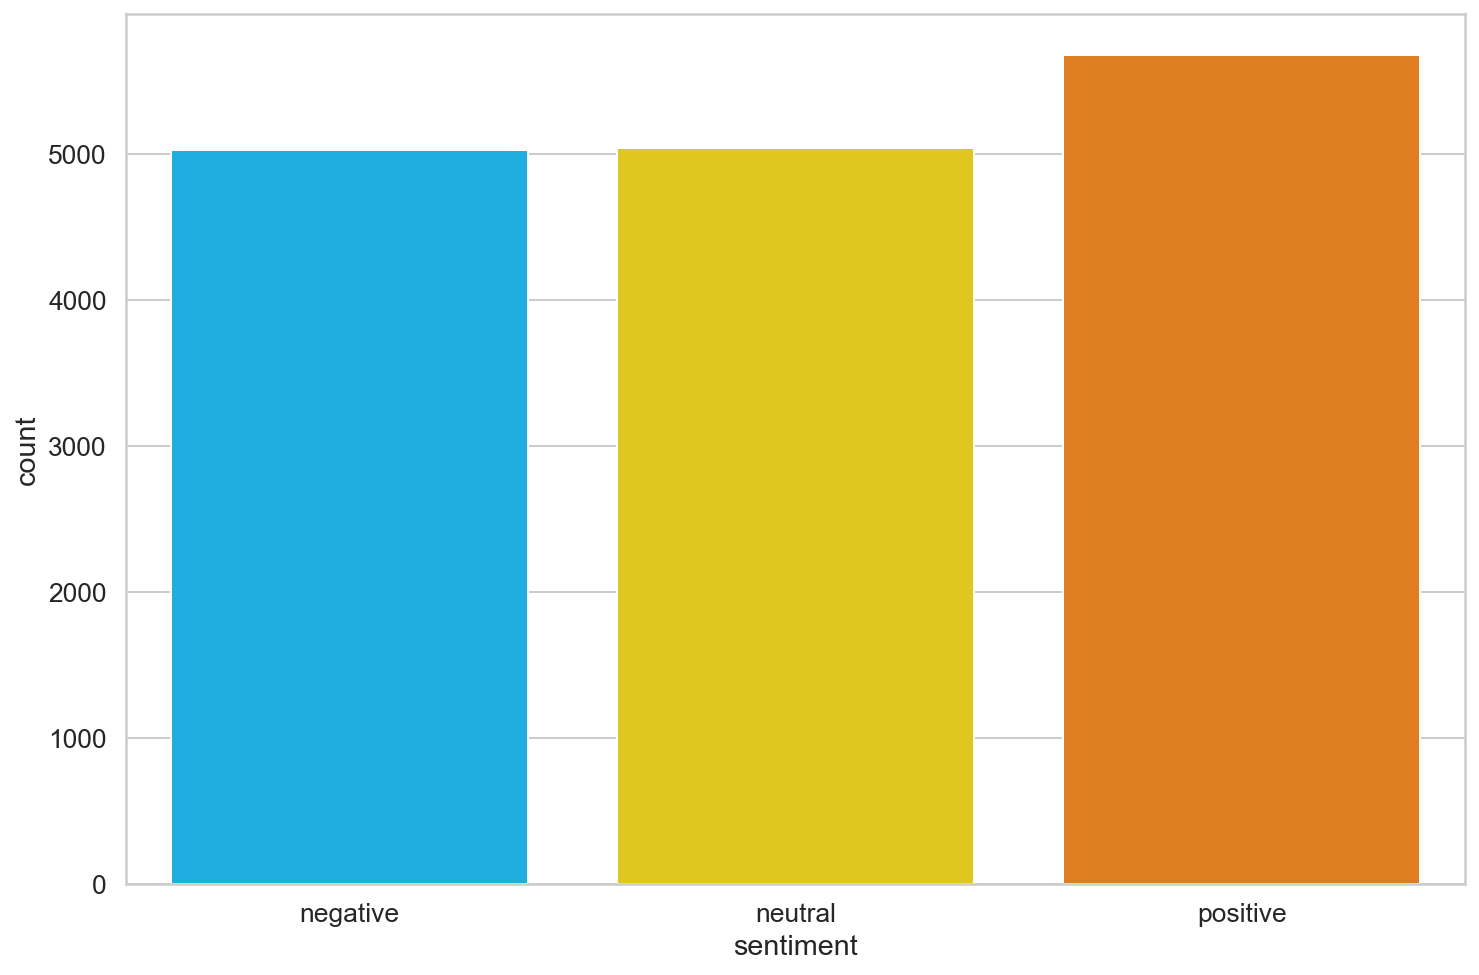

In [18]:
#review changes
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(df_google.sentiment)
plt.xlabel('review sentiment')
sns.countplot(df_google.sentiment)
ax.set_xticklabels(class_names);

In [19]:
#subset google for relavent info
df_google_subset = df_google[['content', 'sentiment']]

#rename for gpu loading
frames = [df_google_subset] #I omitted df_imdb, due to limited gpu memory
df = pd.concat(frames)
df

,content,sentiment
0,Update: After getting a response from the deve...,0
1,Used it for a fair amount of time without any ...,0
2,Your app sucks now!!!!! Used to be good but no...,0
3,"It seems OK, but very basic. Recurring tasks n...",0
4,Absolutely worthless. This app runs a prohibit...,0
...,...,...
15741,I believe that this is by far the best app wit...,2
15742,It sometimes crashes a lot!!,2
15743,Works well for what I need,2
15744,Love it.,2


<a id='#3.1.3'></a>

## 3.1.3 Pre-Process Cont. (Tokenize Data)

1) Add special tokens to separate sentences and do classification

2) Pass sequences of constant length (introduce padding)

3) Create array of 0s (pad token) and 1s (real token) called 'attention mask'

In [20]:
#there are two model types to choose from, case and uncased. 
#We're using 'cased', as "BAD" might convey more sentiment than "bad".

#identify model
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [21]:
#load pre-trained BertTokenizer
#https://huggingface.co/transformers/model_doc/bert.html#berttokenizer

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

#if you get an error, execute 'conda install -c conda-forge ipywidgets' in your env:
#https://ipywidgets.readthedocs.io/en/stable/user_install.html

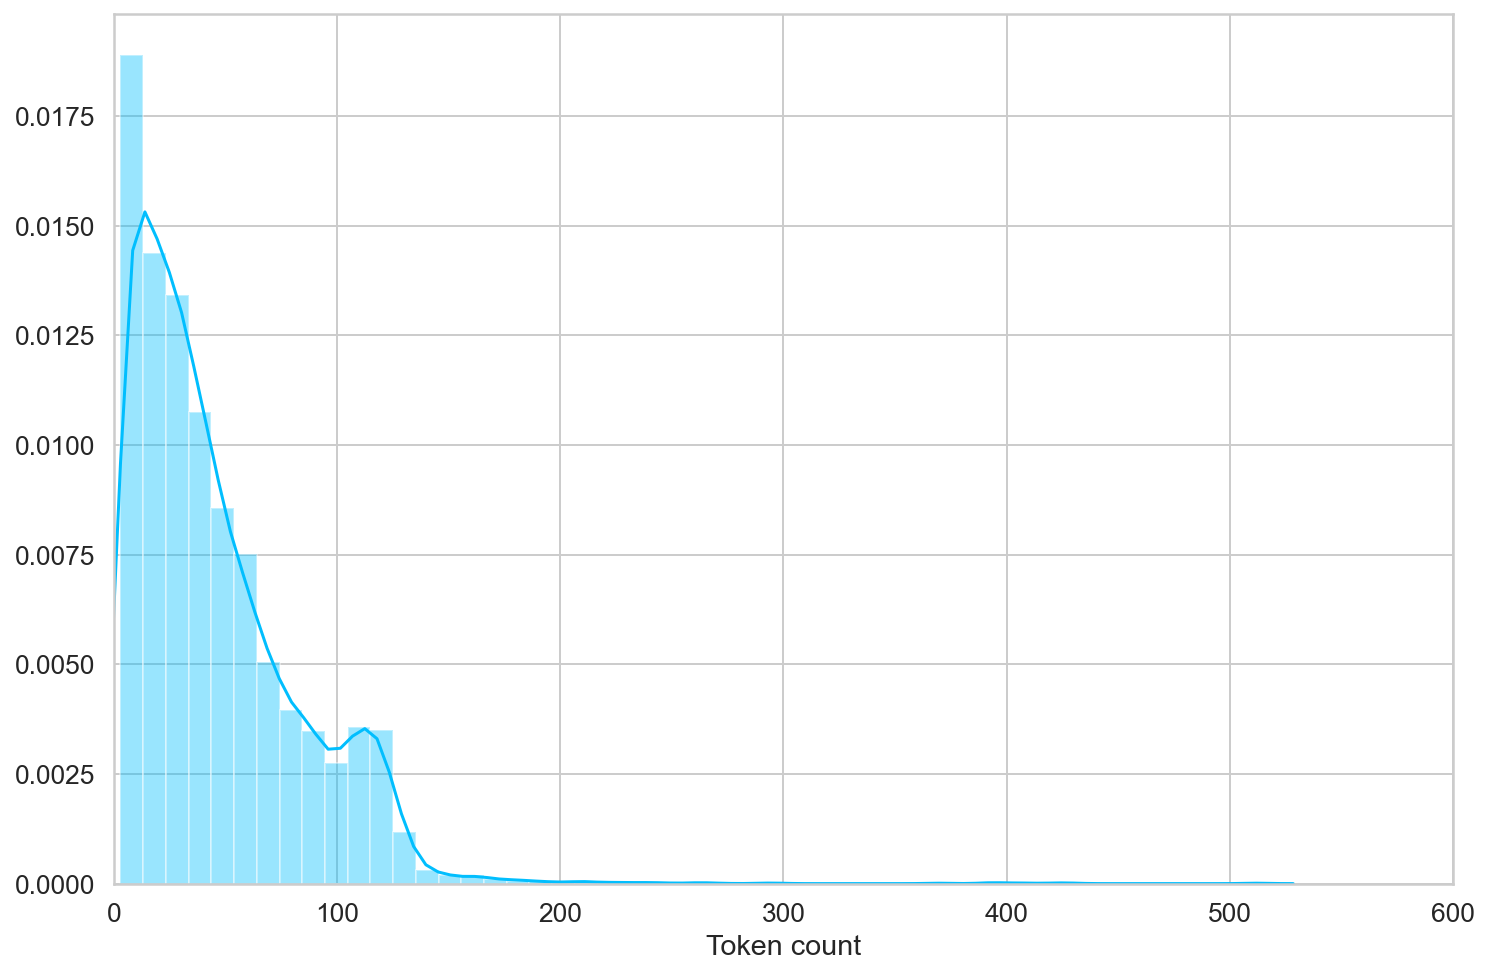

In [22]:
#BERT works with fixed-length sequences. Let's inspect the length of each review from our training dataset and tokenize it
token_lens = []

for txt in df.content:
  tokens = tokenizer.encode(txt, max_length=512) #max len of this model is 512, sadly
  token_lens.append(len(tokens))
    
#let's plot the distribution to get a sense of what we're working with
sns.distplot(token_lens)
plt.xlim([0, 600]);
plt.xlabel('Token count');

In [23]:
#as a result of trial and error, due to gpu memeory limitations, we need to set a max len of our tensors to 150.
MAX_LEN = 150

In [24]:
#let's format our dataset to PyTorch dataset.
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [25]:
#test-train-split training data
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [26]:
#inspect shape
df_train.shape, df_val.shape, df_test.shape

((14171, 2), (787, 2), (788, 2))

In [27]:
#data loader, that's required in the tutorial. I see that it's converting things to numpy arrays, 
#but aside from that, that's all I understand (sadly)
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=0 #when running pytorch in windows, not linux, you need to set this to zero or it crashes.  
  )               #https://github.com/pytorch/pytorch/issues/2341

In [28]:
#set batch size and loader values
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [29]:
#let's look at an example batch from out trining data loader:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [30]:
#inspect shape
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 150])
torch.Size([16, 150])
torch.Size([16])


<a id='#3.1.4'></a>

## 3.1.4 Neural Netowrk Sentiment Classification with BERT and Hugging Face

In [31]:
# load model:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [32]:
#we use this knowledge to make a classifier that uses the BERT mdoel:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [33]:
#let's make an instace if the the above class and move it to our GPU
model = SentimentClassifier(len(class_names))
model = model.to(device)

<a id='#3.1.5'></a>

## 3.1.5 Training (of Model)

In [34]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [35]:
#set training function 
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [36]:
# set eval funciton
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [37]:
# execute training
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.7286022663721919 accuracy 0.6731352762684356
Val   loss 0.5649527412652969 accuracy 0.7623888182973316

Epoch 2/10
----------
Train loss 0.4136901153062321 accuracy 0.842212970150307
Val   loss 0.5212187123298645 accuracy 0.829733163913596

Epoch 3/10
----------
Train loss 0.23031935496066547 accuracy 0.9264695504904382
Val   loss 0.6712528549134731 accuracy 0.8500635324015248

Epoch 4/10
----------
Train loss 0.15470088837546367 accuracy 0.9566720767765154
Val   loss 0.7730028457939625 accuracy 0.8614993646759848

Epoch 5/10
----------
Train loss 0.11202649541333755 accuracy 0.9689506739115095
Val   loss 0.8735891178250312 accuracy 0.8653113087674714

Epoch 6/10
----------
Train loss 0.08706799278174512 accuracy 0.975372239079811
Val   loss 1.0029670621454716 accuracy 0.8564167725540026

Epoch 7/10
----------
Train loss 0.06263055678028151 accuracy 0.9810175710959002
Val   loss 0.9787386448681354 accuracy 0.8576874205844981

Epoch 8/10
----------
Tra

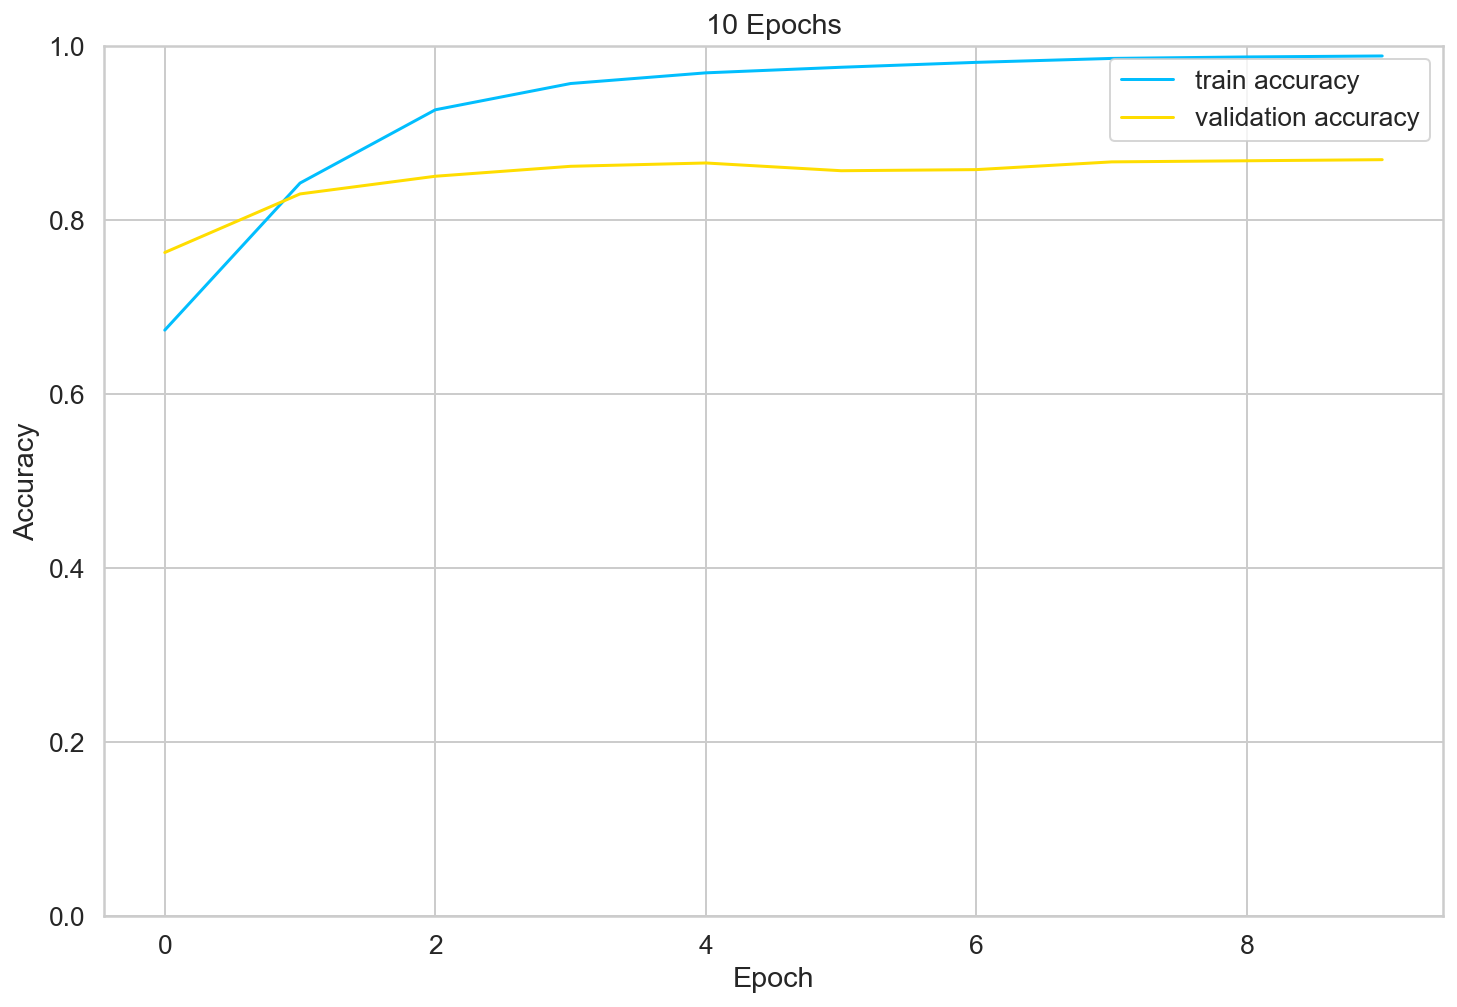

In [38]:
# inspect training results
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('10 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

<a id='#3.1.6'></a>

## 3.1.6 Sentiment Analysis of Game Reviews

In [39]:
# load raw text
df_game_reviews = pd.read_csv(r'../data/processed/game_reviews_processed.csv', low_memory=False)

In [40]:
# subset df to just english reviews
df_english = df_game_reviews[df_game_reviews["language"] == 'english']

In [41]:
# set reviews to list
title_lst = df_english['review'].tolist()

In [42]:
title_lst_final = []

for item in title_lst:
    temp = str(item)
    title_lst_final.append(temp)

In [43]:
# pass each review through sentiment model
review_text_lst = []
prediction_lst = []

for item in title_lst_final:
    encoded_review = tokenizer.encode_plus(item, max_length=MAX_LEN, 
                                           add_special_tokens=True, 
                                           return_token_type_ids=False, 
                                           pad_to_max_length=True, 
                                           return_attention_mask=True, 
                                           return_tensors='pt',)
    
    input_ids = encoded_review['input_ids'].to(device)
    attention_mask = encoded_review['attention_mask'].to(device)
    output = model(input_ids, attention_mask)
    _, prediction = torch.max(output, dim=1)
    
    review_text_lst.append(item)
    prediction_lst.append(class_names[prediction])

In [44]:
#count up your glorious sentiment results
pos_count = 0
neg_count = 0
neu_count = 0

for item in prediction_lst:
    if item == 'positive':
        pos_count += 1
    elif item == 'neutral':
        neu_count += 1
    else:
        neg_count += 1

In [45]:
print('Positive reviews: ', pos_count)
print('Negative reviews: ', neg_count)
print('Neutral reviews: ', neu_count)

Positive reviews:  18939
Negative reviews:  6947
Neutral reviews:  7290


<a id='#3.2'></a>

<a id='#3.1.7'></a>

## 3.2 Sentiment Over Time
--Can you watch that sentiment shift over time?

<a id='#3.2.1'></a>

## 3.2.1 Setup

In [46]:
# join reviews, predictions, timestamps, views-per-day into one df
df_analysis = pd.DataFrame(df_english)

# add predictions to df_analysis
df_analysis['predictions'] = prediction_lst

In [47]:
#add blank sentiment counts to views per day dataframe
df_upd['pos_sent_count'] = np.nan
df_upd['neg_sent_count'] = np.nan
df_upd['neu_sent_count'] = np.nan

In [48]:
#save dfs to csvs
df_upd.to_csv(r'../data/processed/df_upd.csv', index=False)
df_analysis.to_csv(r'../data/processed/df_analysis.csv', index=False)

In [49]:
#edit df_upd in Excel, yep. excel. deal with it. 

#reload df
df_upd = pd.read_csv(r'../data/processed/df_upd_edited.csv', low_memory=False)

#reformat datetime column to python DateTime
df_upd['DateTime'] = pd.to_datetime(df_upd['DateTime'])
#regormat pos_dist to int64
df_upd["pos_dist"] = pd.to_numeric(df_upd["pos_dist"])

In [50]:
#make list of dates, pos_dist, pos_count, neg_count and neu_count
scatter_dates = df_upd['DateTime'].tolist()
scatter_postdist = df_upd['pos_dist'].tolist()
scatter_pos_count = df_upd['pos_sent_count'].tolist()
scatter_neg_count = df_upd['neg_sent_count'].tolist()
scatter_neu_count = df_upd['neu_sent_count'].tolist()

<a id='#3.2.2'></a>

## 3.2.2 Figures

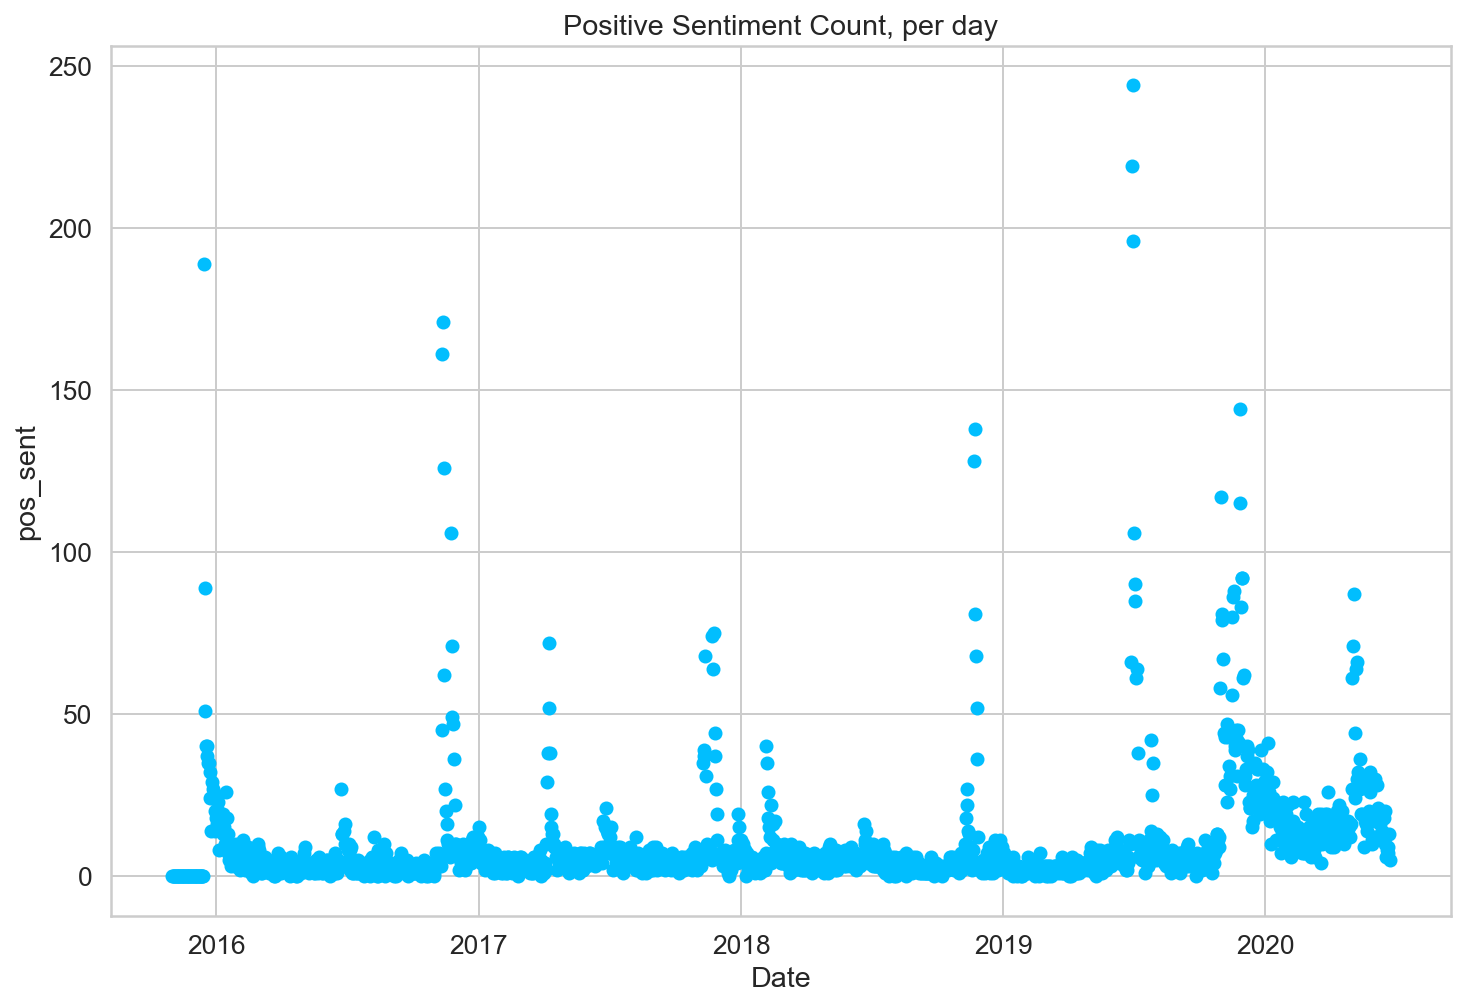

In [51]:
#inspect pos counts
plt.scatter(scatter_dates, scatter_pos_count)
plt.title('Positive Sentiment Count, per day')
plt.ylabel('pos_sent')
plt.xlabel('Date');

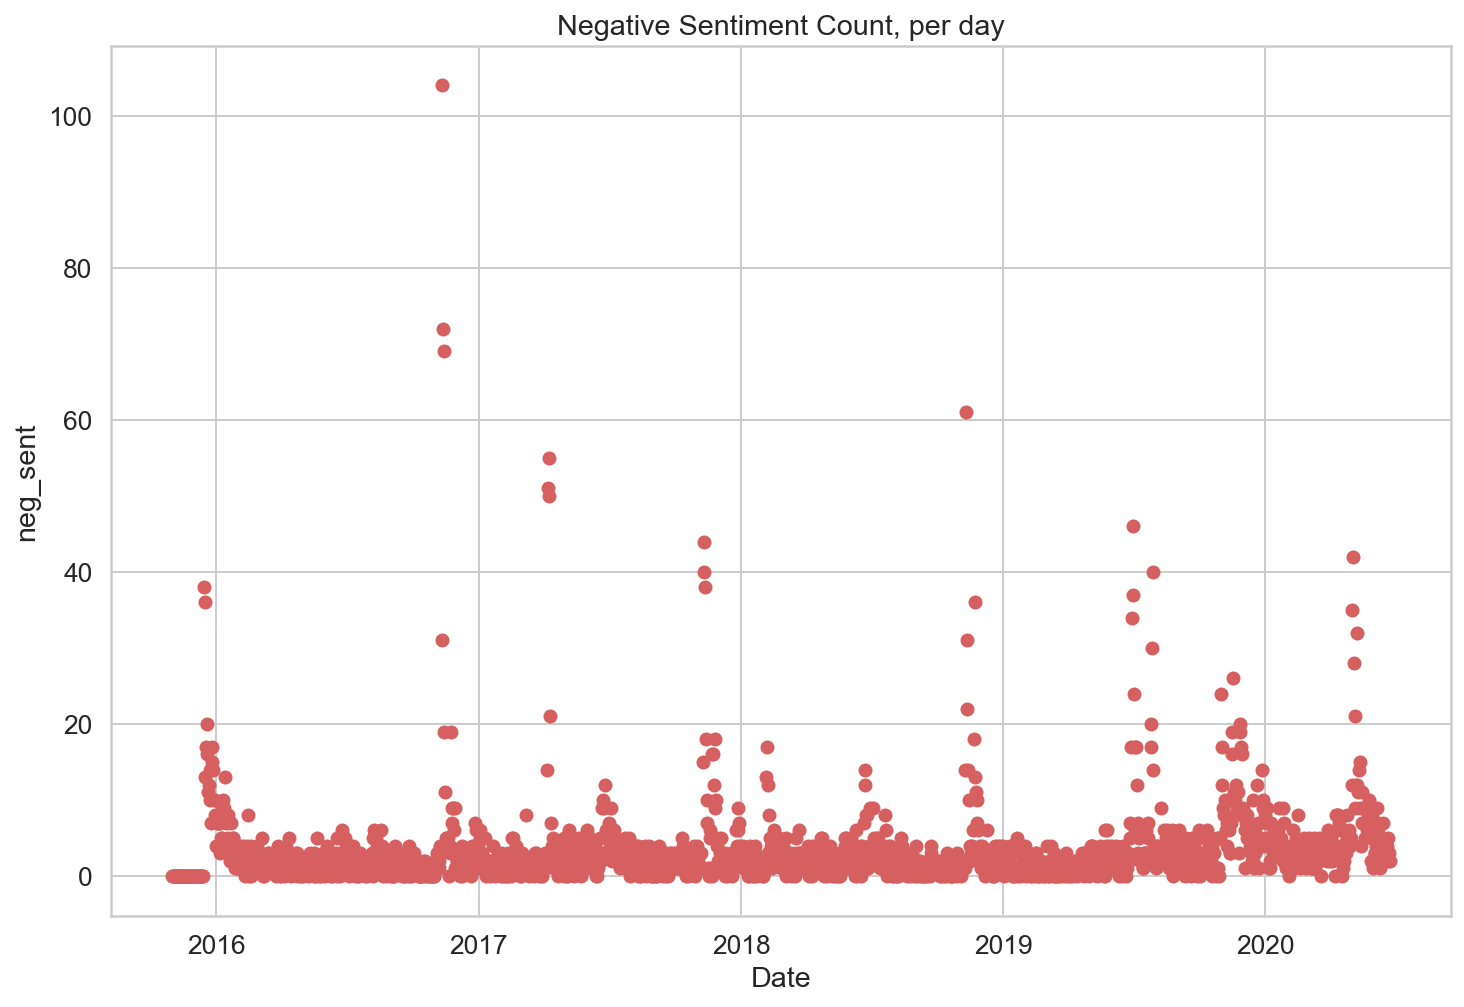

In [52]:
# inspect sentiment over time
plt.scatter(scatter_dates, scatter_neg_count, c='r')
plt.title('Negative Sentiment Count, per day')
plt.ylabel('neg_sent')
plt.xlabel('Date');

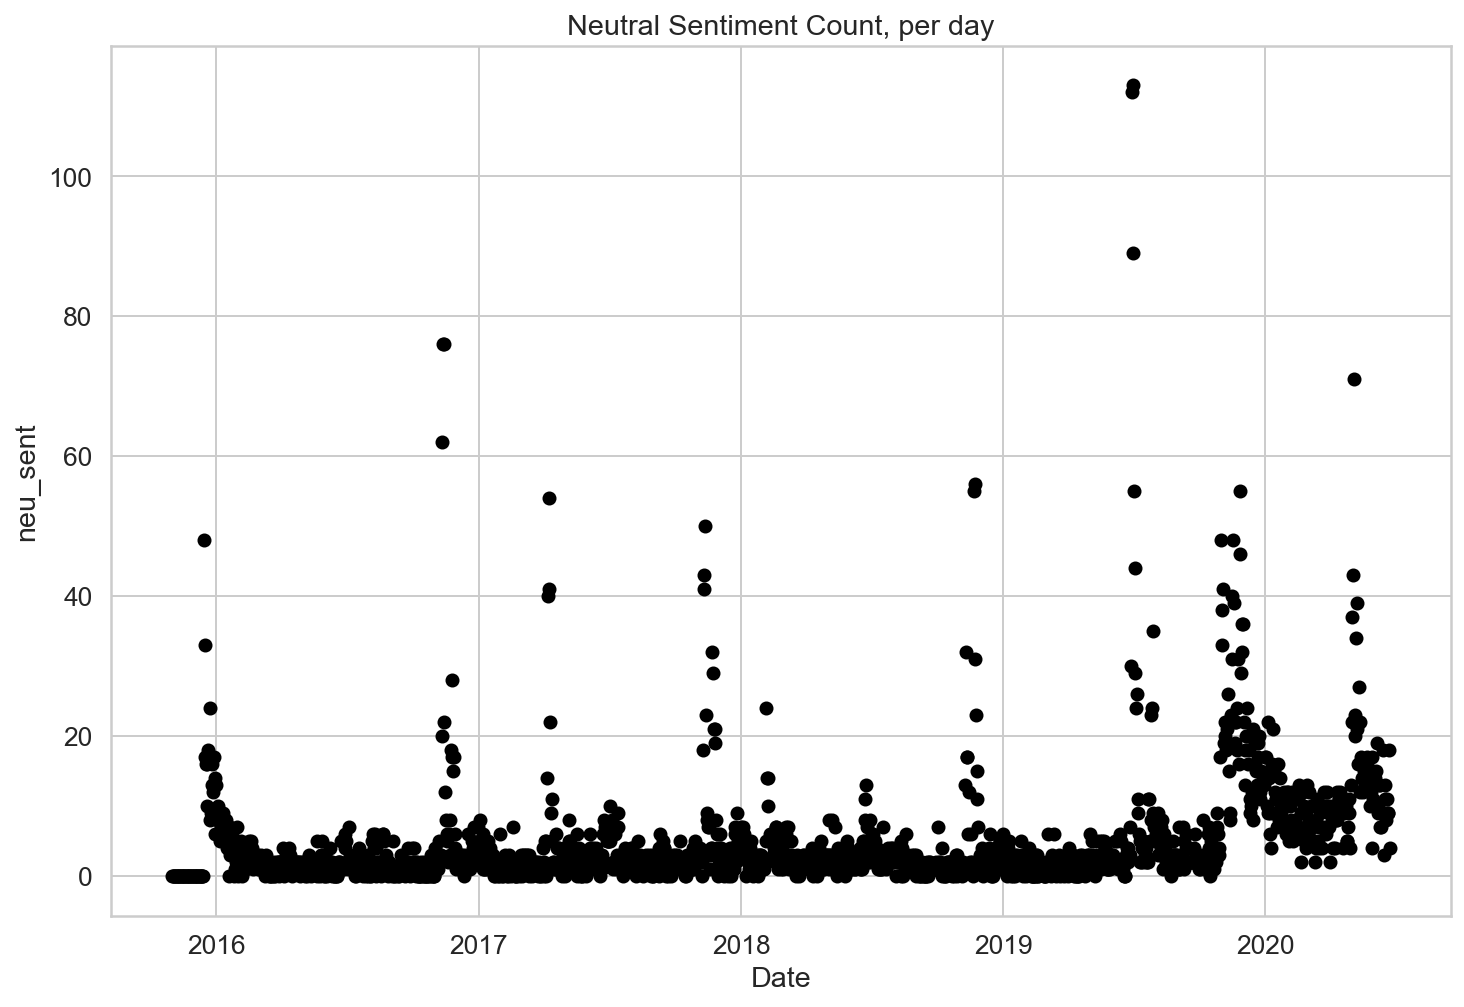

In [53]:
# inspect neutral sentiment over time
plt.scatter(scatter_dates, scatter_neu_count, c='black')
plt.title('Neutral Sentiment Count, per day')
plt.ylabel('neu_sent')
plt.xlabel('Date');

        In review of the sentiment counts and distributions, it would be interesting to see if some of the 'spikes' were the result of the game going on sale. Steam does have regular sales, such as 'summer sales' as well as sales around the holidays. I assume the spikes were the direct result of these. It's also possible that these spikes were due to big Twitch streamers playing the game, and their viewers buying it. Also, the increase observed at the end of 2019 remained a mystery.

<a id='#3.3'></a>

## 3.3 Sentiment Distribution vs. Twitch Views

In [54]:
# make list of twitch views
scatter_ttv_views = df_upd['Twitch_Viewers'].tolist()

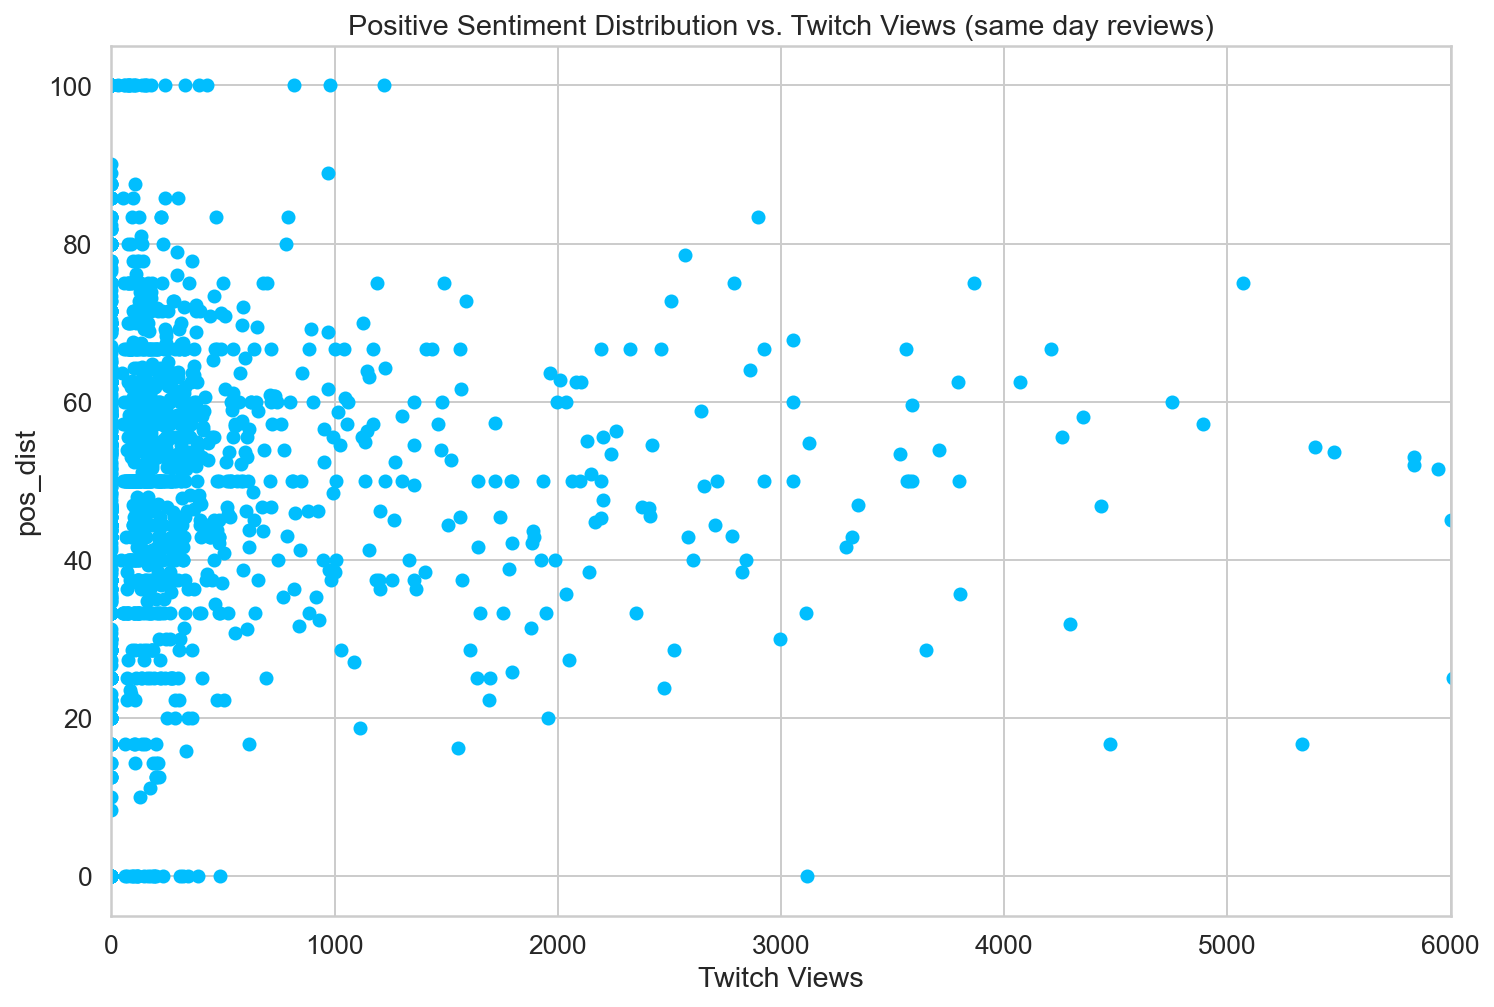

In [55]:
# inspect sentiment over time
plt.scatter(scatter_ttv_views, scatter_postdist)
plt.title('Positive Sentiment Distribution vs. Twitch Views (same day reviews)')
plt.ylabel('pos_dist')
plt.xlabel('Twitch Views')
plt.xlim(0,6000);

<a id='#4.'></a>

## 4. Closing Thoughts

        There were several major hurdles that I had to overcome in my journey that I wanted to quickly address. Sadly, I was not able to answer all the posted questions. The game developers did not share sales figures with me. As as result I was not able to predict sales trends as a function of previous game reviews. I could have used Twitch views as a soft marker of 'sales' but that would have been a stretch. Also, I couldn't explore multiple sentiments via a 3rd-party model: 
   [crystalfeel](http://www.crystalfeel.socialanalyticsplus.net/)
   
        They did not return my inquiries. Nevertheless, I hand-coded a portion of the game reviews by hand, with a ~51% accuracy of expending the lables to the rest of the game reviews. A notebook of that may be found here:
  [multiple sentiments via crystalfeel](https://github.com/cbroker1/text-as-data/blob/master/notebooks/TAD_Week_7_Broker_Carl.ipynb)
  
         GPU Training. Up till this point I did not have that much experience using my GPU for training. Learning how to use pytorch to set up tensors and pass them to my GPU was a challenge. Once I got it up and running however, I had a lot of fun exploring different training datasets and the power GPU training offered in developing larger models (we're talking days of training). My model's accuracy ended up being worse @100k training samples vs 10k, which was a valuable lesson learned:
  [training exploration](https://github.com/cbroker1/text-as-data/blob/master/notebooks/TAD_Week_5_Broker_Carl.ipynb)
  
         I did explore increasing my Epoch count to 100 (8 hours of training on my 10K training dataset) and did not find a significant increace in model performace. Hence why in my final draft I left it at 10 Epochs. 
  
         In the future, I'm interested in exploring longer lenghts of tokens (in turn, sentence length) when using BERT models. A significant portion of the game reviews are longer than what BERT allows. Also, using a rented cloud service for training as that took a significant portion of my time.
         
         Thank you for your time.